In [18]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [3]:
# [].to_csv()
# _변수이름  = pd.read_csv("__경로 파일명",__)

train = pd.read_csv("/kaggle/input/titanic/train.csv")
test = pd.read_csv("/kaggle/input/titanic/test.csv")
sub = pd.read_csv("/kaggle/input/titanic/gender_submission.csv")

train.shape, test.shape, sub.shape


((891, 12), (418, 11), (418, 2))

In [7]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
test.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [9]:
sub.describe()

,PassengerId,Survived
count,418.000000,418.000000
mean,1100.500000,0.363636
std,120.810458,0.481622
min,892.000000,0.000000
25%,996.250000,0.000000
50%,1100.500000,0.000000
75%,1204.750000,1.000000
max,1309.000000,1.000000


In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [11]:
sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Survived     418 non-null    int64
dtypes: int64(2)
memory usage: 6.7 KB


In [12]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [13]:
print(train.columns)
print(test.columns)
print(sub.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
Index(['PassengerId', 'Survived'], dtype='object')


In [15]:
# * train에는 생존자 여부(Survived), test에는 없다.

In [16]:
train.describe(include='O') # 문자열

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [17]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


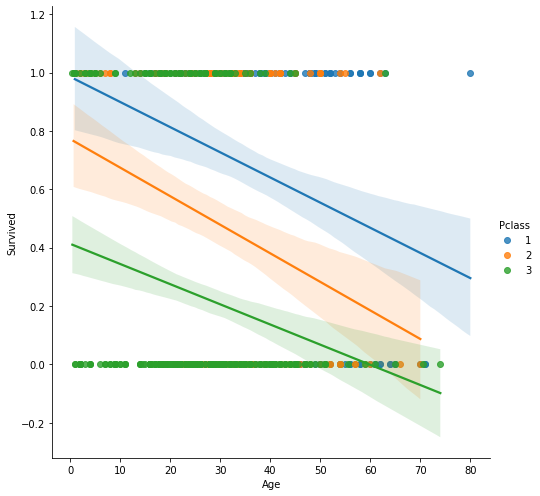

In [20]:
sns.lmplot(x="Age", y="Survived", hue="Pclass", data=train, height=7)

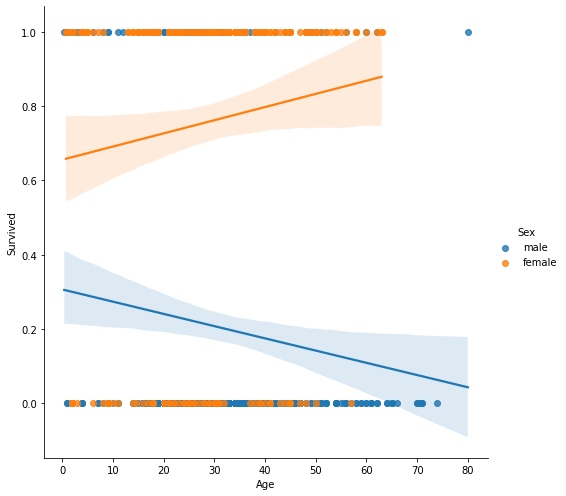

In [33]:
sns.lmplot(x="Age", y="Survived", hue="Sex", data=train, height=7)

<AxesSubplot:xlabel='Pclass', ylabel='count'>

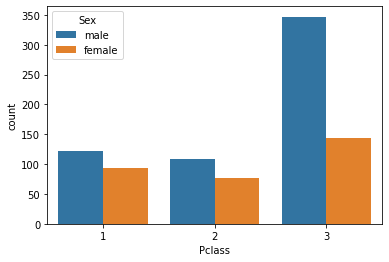

In [31]:
sns.countplot(x="Pclass", hue="Sex", data=train)

<AxesSubplot:>

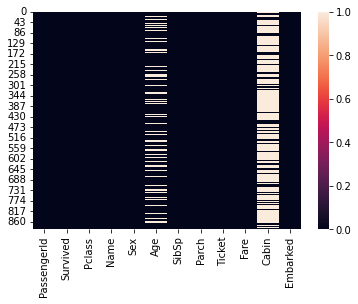

In [22]:
sns.heatmap(train.isnull())

In [23]:
train.describe(include="O") # x축에 들어갈수 있는 변수다.

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


<AxesSubplot:xlabel='Survived', ylabel='count'>

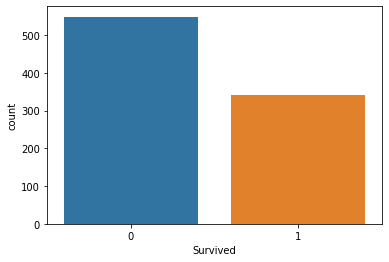

In [24]:
# 숫자 카운트
sns.countplot(x="Survived", data=train)

<AxesSubplot:xlabel='Pclass', ylabel='count'>

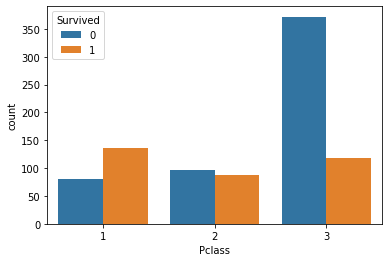

In [26]:
sns.countplot(x="Pclass", hue="Survived", data=train)

<AxesSubplot:xlabel='Pclass', ylabel='count'>

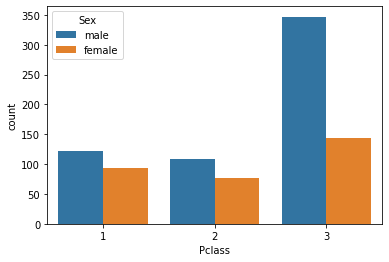

In [27]:
sns.countplot(x="Pclass", hue="Sex", data=train)

In [34]:
# 3등급의 승객은 많은 사람이 사망했다. 생존자에 비해 3배이상
# 왜 사망했지?
# 

<AxesSubplot:xlabel='Age', ylabel='Count'>

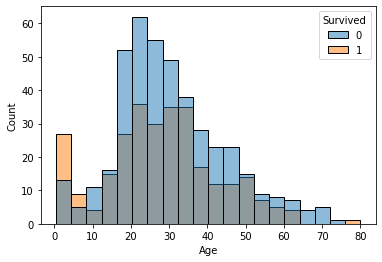

In [36]:
# histogram
sns.histplot(x="Age",hue="Survived", data=train)

<AxesSubplot:xlabel='Age', ylabel='Count'>

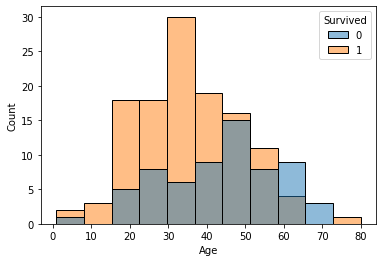

In [39]:
train_p1 = train[train["Pclass"]== 1]
train_p2 = train[train["Pclass"]== 2]
train_p3 = train[train["Pclass"]== 3]

sns.histplot(x="Age",hue="Survived", data=train_p1)

<AxesSubplot:xlabel='Age', ylabel='Count'>

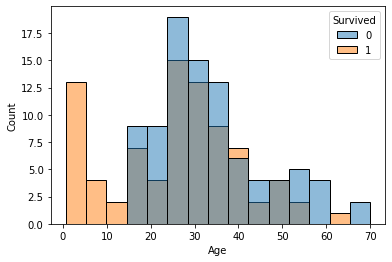

In [40]:
sns.histplot(x="Age",hue="Survived", data=train_p2)

<AxesSubplot:xlabel='Age', ylabel='Count'>

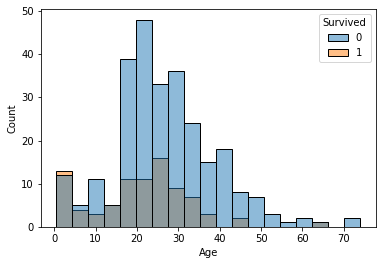

In [41]:
sns.histplot(x="Age",hue="Survived", data=train_p3)

<AxesSubplot:xlabel='Age', ylabel='Count'>

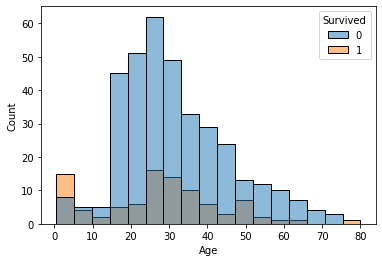

In [42]:
train_male = train[train["Sex"]== "male"]
train_female = train[train["Sex"]== "female"]

sns.histplot(x="Age",hue="Survived", data=train_male)

<AxesSubplot:xlabel='Age', ylabel='Count'>

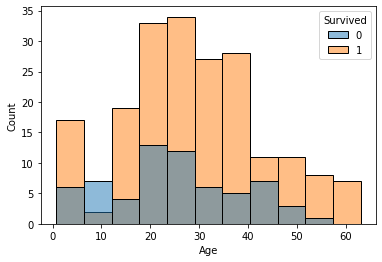

In [43]:
sns.histplot(x="Age",hue="Survived", data=train_female)

<AxesSubplot:xlabel='Sex', ylabel='Count'>

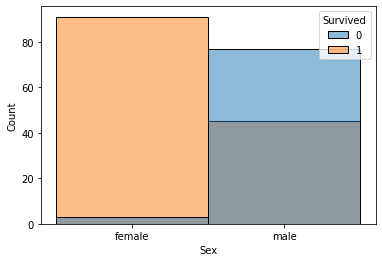

In [44]:
sns.histplot(x="Sex",hue="Survived", data=train_p1)

<AxesSubplot:xlabel='Sex', ylabel='Count'>

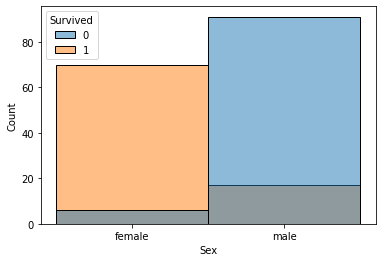

In [45]:
sns.histplot(x="Sex",hue="Survived", data=train_p2)

<AxesSubplot:xlabel='Sex', ylabel='Count'>

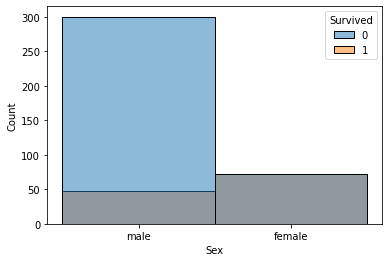

In [46]:
sns.histplot(x="Sex",hue="Survived", data=train_p3)

In [47]:
## 01. Emarked의 영향
## 02. Fare의 요금 방향

### 01 Embarked의 영향

* sns.countplot : x축 존재, y(데이터 개수)
* sns.boxplot : 박스 플롯을 그려줌. 최대, 최소값, 중앙값 - 메디안, 25~75% 상위 하위에 있는 이상치
* sns.lmplot : (x="", y="", data=)
* sns.lmplot : (x="", y="", data="", hue="", ,data=)
* sns.pairplot : 그래프 여러개 (하나의 변수와 다른 변수의 상관관계 보기)
* sns.heatmap()
* sns.histplot : 히스토그램 (도수분포표)를 그려준다. 수치형변수(Column)에 대한 분포 확인
* sns.barplot : 막대그래프 - x는 범주형, y는 그 값의 평균

In [48]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

<AxesSubplot:xlabel='Embarked', ylabel='count'>

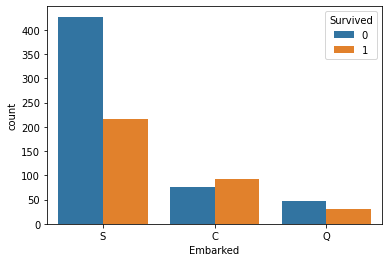

In [49]:
sns.countplot(x="Embarked", hue="Survived", data=train)

In [50]:
train_S = train[train["Embarked"]== "S"]
train_C = train[train["Embarked"]== "C"]
train_Q = train[train["Embarked"]== "Q"]

<AxesSubplot:xlabel='Pclass', ylabel='count'>

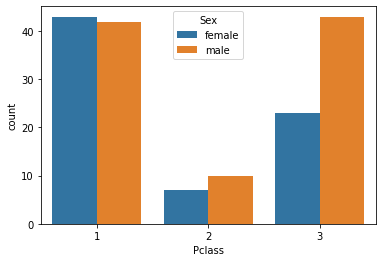

In [53]:
sns.countplot(x="Pclass", hue="Sex", data=train_C)

<AxesSubplot:xlabel='Pclass', ylabel='count'>

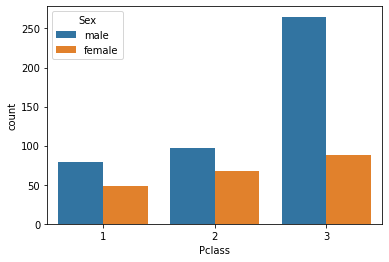

In [54]:
sns.countplot(x="Pclass", hue="Sex", data=train_S)

<AxesSubplot:xlabel='Pclass', ylabel='count'>

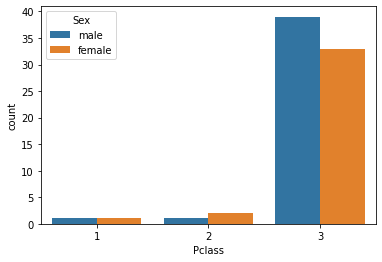

In [55]:
sns.countplot(x="Pclass", hue="Sex", data=train_Q)

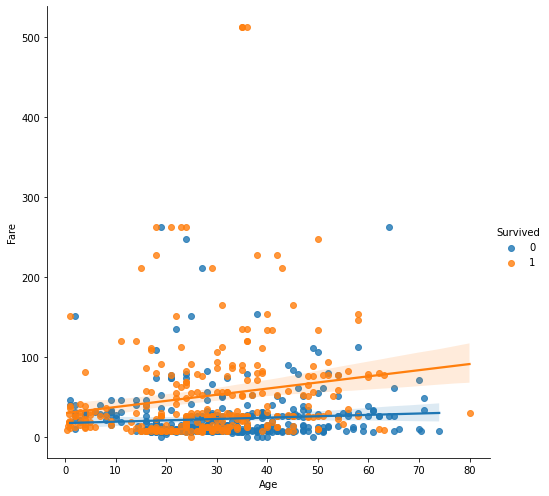

In [63]:
sns.lmplot(x="Age", y="Fare", hue="Survived", data=train, height=7)

<AxesSubplot:xlabel='Embarked', ylabel='Fare'>

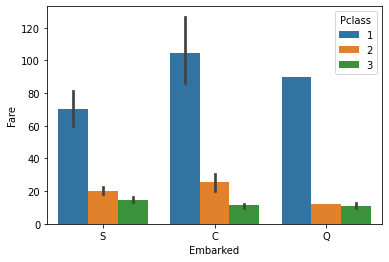

In [77]:
sns.barplot(x="Embarked", y="Fare", hue="Pclass", data=train)

In [86]:
null_age_list = train[train["Age"].isnull()]

null_age_list

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S
